In [ ]:
!pip install --upgrade tensorflow-gpu==2.0

In [ ]:
pip install --upgrade numpy scipy pandas

In [ ]:
!pip install plotly
!pip install --upgrade nbformat
!pip install nltk
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# !pip install plotly
# !pip install nltk
# import nltk
# nltk.download('punkt')

In [ ]:
# !pip install spacy # spaCy is an open-source software library for advanced natural language processing
# !pip install WordCloud

In [ ]:
# import pandas as pd
# import numpy as np


In [ ]:
# import tensorflow as tf

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud, STOPWORDS
# import nltk
# import re

In [ ]:
# # import keras
# from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
# from tensorflow.keras.models import Model


In [ ]:
from google.colab import files
uploaded = files.upload()  

Saving TrueRE.csv to TrueRE (1).csv
Saving FakeRE.csv to FakeRE (1).csv


In [ ]:
import io

In [ ]:
# load the data
true = pd.read_csv(io.BytesIO(uploaded['TrueRE.csv']))
fake = pd.read_csv(io.BytesIO(uploaded['FakeRE.csv']))

In [ ]:
# add a target class column to indicate whether the news is real or fake
true['fakeOrNot'] = 1
true.head()

,TITLE,TEXT,SUBJECT,DATE,fakeOrNot
0,Trump budget opens new fight among Republicans,WASHINGTON (Reuters) - Republican U.S. Represe...,politicsNews,"March 13, 2017",1
1,Trump tried to call New York prosecutor Bharar...,WASHINGTON (Reuters) - Two days before U.S. At...,politicsNews,"March 12, 2017",1
2,NY prosecutor’s office likely to plot similar ...,NEW YORK/WASHINGTON (Reuters) - The Trump admi...,politicsNews,"March 13, 2017",1
3,Puerto Rico creditors urge extension of fiscal...,(Reuters) - A group holding more than $10 bill...,politicsNews,"March 13, 2017",1
4,Biden says would have liked to be the U.S. pre...,"AUSTIN, Texas (Reuters) - Former Democratic U....",politicsNews,"March 12, 2017",1


In [ ]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TITLE      5999 non-null   object
 1   TEXT       5999 non-null   object
 2   SUBJECT    5999 non-null   object
 3   DATE       5999 non-null   object
 4   fakeOrNot  5999 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 234.5+ KB


In [ ]:
fake['fakeOrNot'] = 0
fake.head()

,TITLE,TEXT,SUBJECT,DATE,fakeOrNot
0,Teen Records Himself Abusing Girl: ‘This Is W...,A young man recorded himself as he maliciously...,News,"January 3, 2016",0
1,Professional Panderer Carly Fiorina Says Ted ...,Just days after forsaking her Stanford Cardina...,News,"January 3, 2016",0
2,Poll Finds White Republicans Are Angry Nearly...,In a new poll that asked Americans to comment ...,News,"January 3, 2016",0
3,"What’s Happening In Oregon Is TREASON, Our Fo...","What s happening in Oregon isn t, by any means...",News,"January 3, 2016",0
4,Here Are The Right-Wing Scumbags The Bundy Mi...,When the tense standoff between federal agents...,News,"January 3, 2016",0


In [ ]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TITLE      5980 non-null   object
 1   TEXT       5980 non-null   object
 2   SUBJECT    5980 non-null   object
 3   DATE       5980 non-null   object
 4   fakeOrNot  5980 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 233.7+ KB


In [ ]:
# Concatenate Real and Fake News
df = pd.concat([true, fake]).reset_index(drop = True)
df

,TITLE,TEXT,SUBJECT,DATE,fakeOrNot
0,Trump budget opens new fight among Republicans,WASHINGTON (Reuters) - Republican U.S. Represe...,politicsNews,"March 13, 2017",1
1,Trump tried to call New York prosecutor Bharar...,WASHINGTON (Reuters) - Two days before U.S. At...,politicsNews,"March 12, 2017",1
2,NY prosecutor’s office likely to plot similar ...,NEW YORK/WASHINGTON (Reuters) - The Trump admi...,politicsNews,"March 13, 2017",1
3,Puerto Rico creditors urge extension of fiscal...,(Reuters) - A group holding more than $10 bill...,politicsNews,"March 13, 2017",1
4,Biden says would have liked to be the U.S. pre...,"AUSTIN, Texas (Reuters) - Former Democratic U....",politicsNews,"March 12, 2017",1
...,...,...,...,...,...
11974,Liberal Imperium: Quigley’s Anglo-American Est...,Jay Dyer 21st Century WireThis is an addendum ...,Middle-east,"August 25, 2017",0
11975,"SYRIA, NORTH KOREA: Trump’s “Axis of Evil” is ...",Whitney Webb Mint PressBush s Axis of Evil s...,Middle-east,"August 25, 2017",0
11976,AFGHANISTAN: Trump Surges Into the Graveyard o...,"By ramping up US troop levels in Afghanistan,...",Middle-east,"August 24, 2017",0
11977,Black Politicians Increase Attacks on Ben Cars...,Politics can be a nasty business. This latest ...,Middle-east,"August 23, 2017",0


In [ ]:
df.drop(columns = ['DATE'], inplace = True)

In [ ]:
# combine title and text together
df['original'] = df['TITLE'] + ' ' + df['TEXT']
df.head()

,TITLE,TEXT,SUBJECT,fakeOrNot,original
0,Trump budget opens new fight among Republicans,WASHINGTON (Reuters) - Republican U.S. Represe...,politicsNews,1,Trump budget opens new fight among Republicans...
1,Trump tried to call New York prosecutor Bharar...,WASHINGTON (Reuters) - Two days before U.S. At...,politicsNews,1,Trump tried to call New York prosecutor Bharar...
2,NY prosecutor’s office likely to plot similar ...,NEW YORK/WASHINGTON (Reuters) - The Trump admi...,politicsNews,1,NY prosecutor’s office likely to plot similar ...
3,Puerto Rico creditors urge extension of fiscal...,(Reuters) - A group holding more than $10 bill...,politicsNews,1,Puerto Rico creditors urge extension of fiscal...
4,Biden says would have liked to be the U.S. pre...,"AUSTIN, Texas (Reuters) - Former Democratic U....",politicsNews,1,Biden says would have liked to be the U.S. pre...


In [ ]:
df['original'][8]

'U.S. civil liberties group ACLU seeks to tap anti-Trump energy NEW YORK (Reuters) - The American Civil Liberties Union is launching what it bills as the first grassroots mobilization effort in its nearly 100-year history, as it seeks to harness a surge of energy among left-leaning activists since the November election of Republican Donald Trump as U.S. president. The campaign, known as PeoplePower, kicks off on Saturday with a town hall-style event in Miami featuring “resistance training” that will be streamed live at more than 2,300 local gatherings nationwide.  It will focus on free speech, reproductive rights and immigration and include presentations from legal experts, ACLU Executive Director Anthony Romero and “Top Chef” television star Padma Lakshmi. Membership in the civil rights organization, which was founded in 1920, has tripled to more than 1 million since Trump’s election, the group says.  As activists have marched in streets, demonstrated at airports and confronted U.S. l

In [ ]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
pip install --upgrade numpy

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [ ]:
# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
# Apply the function to the dataframe
df['clean'] = df['original'].apply(preprocess)

In [ ]:
# Show original news
df['original'][9]

'Puerto Rico governor ups revenue forecast in revised fiscal plan (Reuters) - Puerto Rico’s governor said on Saturday he has delivered a revised fiscal turnaround plan to the U.S. territory’s financial oversight board that includes $262 million in additional revenue and changes to healthcare funding.  Governor Ricardo Rossello’s initial plan, presented on Feb. 28, was rejected by the board, which said it relied on overly optimistic baseline revenue and economic growth forecasts. The board must approve a turnaround blueprint for the island under the federal Puerto Rico rescue law known as PROMESA. It has said it plans to do by March 15.  Francisco Cimadevilla, a spokesman for the board, said the seven-member panel is still evaluating the new proposal and will not have any comment before a public hearing in New York on Monday.  Rossello’s office issued a statement on Saturday announcing the revamped plan, but gave little detail. It said the plan would continue to try to protect Puerto Ri

In [ ]:
# Show cleaned up news after removing stopwords
print(df['clean'][0])

['trump', 'budget', 'opens', 'fight', 'republicans', 'washington', 'reuters', 'republican', 'representative', 'todd', 'rokita', 'keeps', 'clock', 'hanging', 'wall', 'capitol', 'hill', 'office', 'tracks', 'government', 'rising', 'debt', 'real', 'time', 'reminds', 'priority', 'reining', 'federal', 'spending', 'sent', 'fiscal', 'note', 'said', 'indiana', 'lawmaker', 'vice', 'chairman', 'house', 'representatives', 'budget', 'committee', 'rode', 'republican', 'wave', 'election', 'congress', 'president', 'donald', 'trump', 'unveils', 'budget', 'fiscal', 'year', 'thursday', 'rokita', 'conservative', 'republicans', 'cheering', 'proposed', 'cuts', 'domestic', 'programs', 'military', 'buildup', 'moderate', 'republicans', 'enthusiastic', 'worry', 'trump', 'budget', 'force', 'lawmakers', 'choose', 'opposing', 'president', 'backing', 'reductions', 'popular', 'programs', 'disabled', 'children', 'meals', 'elderly', 'hope', 'administration', 'aware', 'difficulty', 'things', 'said', 'representative', '

In [ ]:
df

,TITLE,TEXT,SUBJECT,fakeOrNot,original,clean
0,Trump budget opens new fight among Republicans,WASHINGTON (Reuters) - Republican U.S. Represe...,politicsNews,1,Trump budget opens new fight among Republicans...,"[trump, budget, opens, fight, republicans, was..."
1,Trump tried to call New York prosecutor Bharar...,WASHINGTON (Reuters) - Two days before U.S. At...,politicsNews,1,Trump tried to call New York prosecutor Bharar...,"[trump, tried, york, prosecutor, bharara, firi..."
2,NY prosecutor’s office likely to plot similar ...,NEW YORK/WASHINGTON (Reuters) - The Trump admi...,politicsNews,1,NY prosecutor’s office likely to plot similar ...,"[prosecutor, office, likely, plot, similar, co..."
3,Puerto Rico creditors urge extension of fiscal...,(Reuters) - A group holding more than $10 bill...,politicsNews,1,Puerto Rico creditors urge extension of fiscal...,"[puerto, rico, creditors, urge, extension, fis..."
4,Biden says would have liked to be the U.S. pre...,"AUSTIN, Texas (Reuters) - Former Democratic U....",politicsNews,1,Biden says would have liked to be the U.S. pre...,"[biden, says, liked, president, ended, cancer,..."
...,...,...,...,...,...,...
11974,Liberal Imperium: Quigley’s Anglo-American Est...,Jay Dyer 21st Century WireThis is an addendum ...,Middle-east,0,Liberal Imperium: Quigley’s Anglo-American Est...,"[liberal, imperium, quigley, anglo, american, ..."
11975,"SYRIA, NORTH KOREA: Trump’s “Axis of Evil” is ...",Whitney Webb Mint PressBush s Axis of Evil s...,Middle-east,0,"SYRIA, NORTH KOREA: Trump’s “Axis of Evil” is ...","[syria, north, korea, trump, axis, evil, bigge..."
11976,AFGHANISTAN: Trump Surges Into the Graveyard o...,"By ramping up US troop levels in Afghanistan,...",Middle-east,0,AFGHANISTAN: Trump Surges Into the Graveyard o...,"[afghanistan, trump, surges, graveyard, empire..."
11977,Black Politicians Increase Attacks on Ben Cars...,Politics can be a nasty business. This latest ...,Middle-east,0,Black Politicians Increase Attacks on Ben Cars...,"[black, politicians, increase, attacks, carson..."


In [ ]:
# Obtain the total words present in the dataset
list_ = []
for i in df.clean:
    for j in i:
        list_.append(j)

In [ ]:
list_

['trump',
 'budget',
 'opens',
 'fight',
 'republicans',
 'washington',
 'reuters',
 'republican',
 'representative',
 'todd',
 'rokita',
 'keeps',
 'clock',
 'hanging',
 'wall',
 'capitol',
 'hill',
 'office',
 'tracks',
 'government',
 'rising',
 'debt',
 'real',
 'time',
 'reminds',
 'priority',
 'reining',
 'federal',
 'spending',
 'sent',
 'fiscal',
 'note',
 'said',
 'indiana',
 'lawmaker',
 'vice',
 'chairman',
 'house',
 'representatives',
 'budget',
 'committee',
 'rode',
 'republican',
 'wave',
 'election',
 'congress',
 'president',
 'donald',
 'trump',
 'unveils',
 'budget',
 'fiscal',
 'year',
 'thursday',
 'rokita',
 'conservative',
 'republicans',
 'cheering',
 'proposed',
 'cuts',
 'domestic',
 'programs',
 'military',
 'buildup',
 'moderate',
 'republicans',
 'enthusiastic',
 'worry',
 'trump',
 'budget',
 'force',
 'lawmakers',
 'choose',
 'opposing',
 'president',
 'backing',
 'reductions',
 'popular',
 'programs',
 'disabled',
 'children',
 'meals',
 'elderly',
 'ho

In [ ]:
len(list_)

2445737

In [ ]:
# Obtain the total number of unique words
totalwords = len(list(set(list_)))
totalwords

53684

In [ ]:
# join the words into a string
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [ ]:
df

,TITLE,TEXT,SUBJECT,fakeOrNot,original,clean,clean_joined
0,Trump budget opens new fight among Republicans,WASHINGTON (Reuters) - Republican U.S. Represe...,politicsNews,1,Trump budget opens new fight among Republicans...,"[trump, budget, opens, fight, republicans, was...",trump budget opens fight republicans washingto...
1,Trump tried to call New York prosecutor Bharar...,WASHINGTON (Reuters) - Two days before U.S. At...,politicsNews,1,Trump tried to call New York prosecutor Bharar...,"[trump, tried, york, prosecutor, bharara, firi...",trump tried york prosecutor bharara firing off...
2,NY prosecutor’s office likely to plot similar ...,NEW YORK/WASHINGTON (Reuters) - The Trump admi...,politicsNews,1,NY prosecutor’s office likely to plot similar ...,"[prosecutor, office, likely, plot, similar, co...",prosecutor office likely plot similar course b...
3,Puerto Rico creditors urge extension of fiscal...,(Reuters) - A group holding more than $10 bill...,politicsNews,1,Puerto Rico creditors urge extension of fiscal...,"[puerto, rico, creditors, urge, extension, fis...",puerto rico creditors urge extension fiscal pl...
4,Biden says would have liked to be the U.S. pre...,"AUSTIN, Texas (Reuters) - Former Democratic U....",politicsNews,1,Biden says would have liked to be the U.S. pre...,"[biden, says, liked, president, ended, cancer,...",biden says liked president ended cancer austin...
...,...,...,...,...,...,...,...
11974,Liberal Imperium: Quigley’s Anglo-American Est...,Jay Dyer 21st Century WireThis is an addendum ...,Middle-east,0,Liberal Imperium: Quigley’s Anglo-American Est...,"[liberal, imperium, quigley, anglo, american, ...",liberal imperium quigley anglo american establ...
11975,"SYRIA, NORTH KOREA: Trump’s “Axis of Evil” is ...",Whitney Webb Mint PressBush s Axis of Evil s...,Middle-east,0,"SYRIA, NORTH KOREA: Trump’s “Axis of Evil” is ...","[syria, north, korea, trump, axis, evil, bigge...",syria north korea trump axis evil bigger bette...
11976,AFGHANISTAN: Trump Surges Into the Graveyard o...,"By ramping up US troop levels in Afghanistan,...",Middle-east,0,AFGHANISTAN: Trump Surges Into the Graveyard o...,"[afghanistan, trump, surges, graveyard, empire...",afghanistan trump surges graveyard empires ram...
11977,Black Politicians Increase Attacks on Ben Cars...,Politics can be a nasty business. This latest ...,Middle-east,0,Black Politicians Increase Attacks on Ben Cars...,"[black, politicians, increase, attacks, carson...",black politicians increase attacks carson accu...


In [ ]:
df['clean_joined'][4]

'biden says liked president ended cancer austin texas reuters democratic vice president biden said sunday major speeches leaving office year liked president ended cancer know biden beau died brain cancer delivered emotional speech south southwest technology summit austin texas continuing work democratic president barack obama called cancer moonshot initiative aimed speeding research cancer therapies spoke need prevention research collaboration data battle cancer biden mention republican president donald trump said speech thousand people willing work current administration fight cancer kills estimated americans year bipartisan thing left america fight cancer said biden said formal announcement obama asked regrets biden said told obama loved president presided cancer know said months followed death stomach president president united states prepared ounce energy said praised republicans working democrats fight cancer office slight trump administration suggesting outfit abide research glob

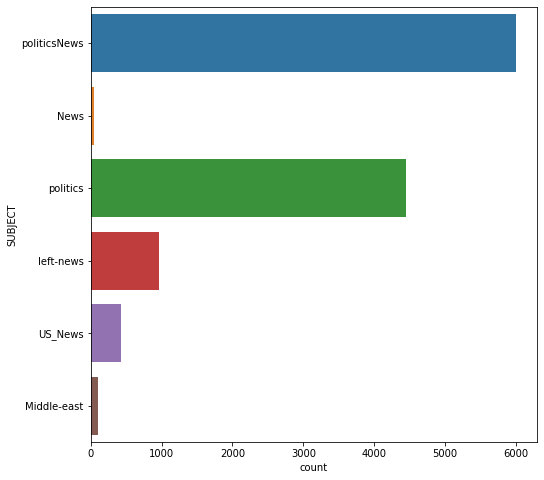

In [ ]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "SUBJECT", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


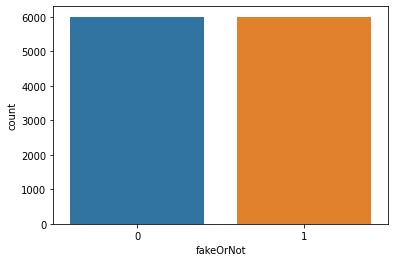

In [ ]:
sns.countplot(df['fakeOrNot'], label='count')

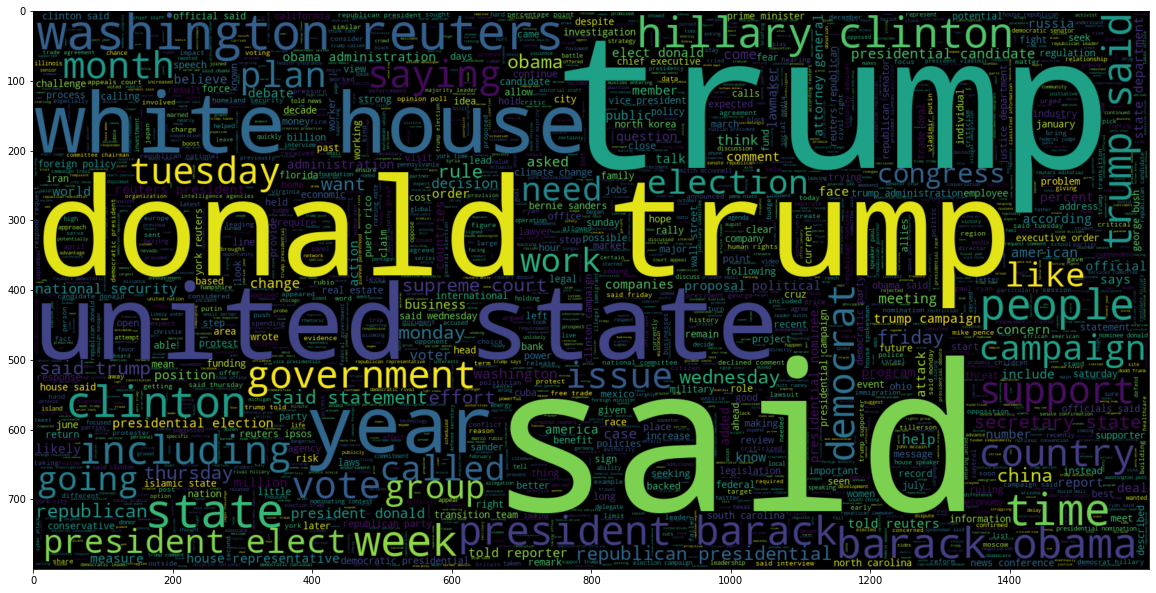

In [ ]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.fakeOrNot == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

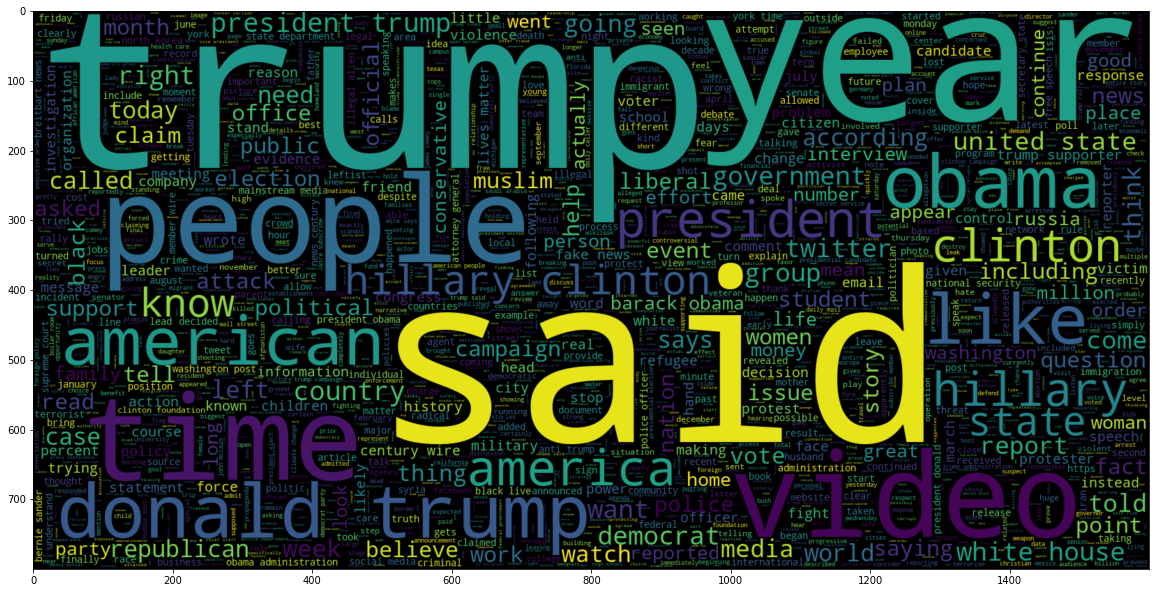

In [ ]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.fakeOrNot == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
# split data into test and train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.fakeOrNot, test_size = 0.2)

In [ ]:
from nltk import word_tokenize

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = totalwords)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [ ]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 trump budget opens fight republicans washington reuters republican representative todd rokita keeps clock hanging wall capitol hill office tracks government rising debt real time reminds priority reining federal spending sent fiscal note said indiana lawmaker vice chairman house representatives budget committee rode republican wave election congress president donald trump unveils budget fiscal year thursday rokita conservative republicans cheering proposed cuts domestic programs military buildup moderate republicans enthusiastic worry trump budget force lawmakers choose opposing president backing reductions popular programs disabled children meals elderly hope administration aware difficulty things said representative cole oklahoma release trump budget comes republican president facing intraparty revolt proposed legislation replace obamacare healthcare open fight republicans control houses congress government running lawmakers need approve spending plan later

In [ ]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [ ]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [   14     8 22516    31  1074  1084     6  8692    16    11    14     8
  2605   472    62  6593   753    31   724     3    75     5   197    30
    87  1588   509  3535  1074 15705  2971   323  1467  2590  2547  1460
   323  2341   197    30]
The padded encoding for document 2  is :  [8073 2183 1202  411 6244    1   29    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


In [ ]:
pip install numpy==1.19.5

  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.0 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.0.2 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install -U numpy==1.18.5

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional

In [ ]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(totalwords, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
# model.add(Bidirectional(LSTM(64)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         6871552   
_________________________________________________________________
dense (Dense)                (None, None, 128)         16512     
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           129       
Total params: 6,888,193
Trainable params: 6,888,193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
totalwords

53684

In [ ]:
y_train = np.asarray(y_train)

In [ ]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Train on 8624 samples, validate on 959 samples
Epoch 1/2
8624/8624 [==============================] - 20s 2ms/sample - loss: 0.5801 - acc: 0.6942 - val_loss: 0.5340 - val_acc: 0.7215
Epoch 2/2
8624/8624 [==============================] - 20s 2ms/sample - loss: 0.5126 - acc: 0.7442 - val_loss: 0.5330 - val_acc: 0.7224


In [ ]:
# make prediction
pred = model.predict(padded_test)

In [ ]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].any() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [ ]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.4791318864774624
